## Budget Analysis
### Environment Setup

In [60]:
# Initial Imports
import os
import plaid
import requests
import datetime
import json
import pandas as pd
from dotenv import load_dotenv

%matplotlib inline

In [61]:
# Helper functions

def pretty_print_response(response):
    """
    This function formats a JSON file to pretty printing it in the screen.
    """
    print(json.dumps(response, indent=4, sort_keys=True))

In [62]:
# Set environment variables from the .env file
load_dotenv() 

True

In [63]:
# Extract API keys from environment variables
PLAID_CLIENT_ID = os.getenv("PLAID_CLIENT_ID")
PLAID_SECRET = os.getenv("PLAID_SECRET")
PLAID_PUBLIC_KEY = os.getenv("PLAID_PUBLIC_KEY")

### Plaid Access Token

In [64]:
# Create client object
client = plaid.Client(PLAID_CLIENT_ID, PLAID_SECRET, PLAID_PUBLIC_KEY, environment='sandbox')

In [65]:
# Select an institution for processing
INSTITUTION_ID = "ins_109508"

# Create public token to be exchanged for institution access token
create_tkn_response = client.Sandbox.public_token.create(INSTITUTION_ID, ['transactions','income','assets'])

# Exchange public token for access token
exchange_response = client.Item.public_token.exchange(create_tkn_response['public_token'])

# Store access token as variable
access_token = exchange_response['access_token']

In [9]:
# Get accounts associated with institution
client.Accounts.get(access_token)

{'accounts': [{'account_id': 'ajl1oxdvv4tZQREpDGlnUwmnjw68gEc7B4xMm',
   'balances': {'available': 100,
    'current': 110,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '0000',
   'name': 'Plaid Checking',
   'official_name': 'Plaid Gold Standard 0% Interest Checking',
   'subtype': 'checking',
   'type': 'depository'},
  {'account_id': '4lPxMqvNNBfkry6dAvGLfLG1dLw7o3CdQ5wPQ',
   'balances': {'available': 200,
    'current': 210,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '1111',
   'name': 'Plaid Saving',
   'official_name': 'Plaid Silver Standard 0.1% Interest Saving',
   'subtype': 'savings',
   'type': 'depository'},
  {'account_id': 'NW9lAkwvvmcMe8LERdn4FRwKPR1DWxcW4Zqw1',
   'balances': {'available': None,
    'current': 1000,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '2222',
   'name': 'Plaid CD',
   'officia

### Account Transactions with Plaid

In [10]:
# Set the start and end date 90 days from today
start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-90))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now())

# Retrieve the transactions for the last 90 days
transactions_response = client.Transactions.get(access_token,start_date,end_date)

# Print the transactions
print(json.dumps(transactions_response['transactions'][:],indent=4, sort_keys=True)) # [:] will pull up all trx's. [:2] will pull up first 2. Replace with any number 

[
    {
        "account_id": "PGwKmnevv9IZoLdpQRePUQgq7QyjMwT7PdrRM",
        "account_owner": null,
        "amount": 500,
        "authorized_date": null,
        "category": [
            "Travel",
            "Airlines and Aviation Services"
        ],
        "category_id": "22001000",
        "date": "2020-07-29",
        "iso_currency_code": "USD",
        "location": {
            "address": null,
            "city": null,
            "country": null,
            "lat": null,
            "lon": null,
            "postal_code": null,
            "region": null,
            "store_number": null
        },
        "merchant_name": "United Airlines",
        "name": "United Airlines",
        "payment_channel": "in store",
        "payment_meta": {
            "by_order_of": null,
            "payee": null,
            "payer": null,
            "payment_method": null,
            "payment_processor": null,
            "ppd_id": null,
            "reason": null,
            "refer

In [11]:
# Create a for-loop to print the categories for each transaction
for transactions in transactions_response['transactions']:
    if transactions['category']:
        print(json.dumps(transactions['category'], indent=4, sort_keys=True))

[
    "Travel",
    "Airlines and Aviation Services"
]
[
    "Travel",
    "Taxi"
]
[
    "Food and Drink",
    "Restaurants"
]
[
    "Payment"
]
[
    "Food and Drink",
    "Restaurants",
    "Fast Food"
]
[
    "Shops",
    "Sporting Goods"
]
[
    "Payment",
    "Credit Card"
]
[
    "Travel",
    "Taxi"
]
[
    "Transfer",
    "Debit"
]
[
    "Transfer",
    "Deposit"
]
[
    "Recreation",
    "Gyms and Fitness Centers"
]
[
    "Travel",
    "Airlines and Aviation Services"
]
[
    "Food and Drink",
    "Restaurants",
    "Fast Food"
]
[
    "Food and Drink",
    "Restaurants",
    "Coffee Shop"
]
[
    "Food and Drink",
    "Restaurants"
]
[
    "Transfer",
    "Credit"
]
[
    "Travel",
    "Airlines and Aviation Services"
]
[
    "Travel",
    "Taxi"
]
[
    "Food and Drink",
    "Restaurants"
]
[
    "Payment"
]
[
    "Food and Drink",
    "Restaurants",
    "Fast Food"
]
[
    "Shops",
    "Sporting Goods"
]
[
    "Payment",
    "Credit Card"
]
[
    "Travel",
    "Taxi"
]
[
 

In [12]:
# Define an empty DataFrame and set the columns as date, name, amount, and category
transaction_df = pd.DataFrame(columns=['date', 'name', 'amount', 'category'])

# Retrieve all the transactions
transactions = transactions_response['transactions']

# Populate the transactions DataFrame with the transactions data
for index, transaction in enumerate(transactions):
    transaction_df.loc[index]=[transaction['date'], transaction['name'], transaction['amount'], transaction['category'][0]]

# Display sample data from the DataFrame    
transaction_df.head()

,date,name,amount,category
0,2020-07-29,United Airlines,500,Travel
1,2020-07-27,Uber 072515 SF**POOL**,6.33,Travel
2,2020-07-24,Tectra Inc,500,Food and Drink
3,2020-07-23,AUTOMATIC PAYMENT - THANK,2078.5,Payment
4,2020-07-23,KFC,500,Food and Drink


In [15]:
# Display data types
transaction_df.dtypes

date        object
name        object
amount      object
category    object
dtype: object

In [16]:
# Set the date column as index
transaction_df.set_index(transaction_df['date'],inplace=True)

# Drop extra column
transaction_df.drop(columns='date', inplace=True)

In [17]:
# Display sample data
transaction_df.head()

,name,amount,category
date,,,
2020-07-29,United Airlines,500,Travel
2020-07-27,Uber 072515 SF**POOL**,6.33,Travel
2020-07-24,Tectra Inc,500,Food and Drink
2020-07-23,AUTOMATIC PAYMENT - THANK,2078.5,Payment
2020-07-23,KFC,500,Food and Drink


### Income Analysis with Plaid

In [18]:
# Fetch the income data
income_response = client.Income.get(access_token)

# Print income data
income_response

{'income': {'income_streams': [{'confidence': 0.99,
    'days': 690,
    'monthly_income': 500,
    'name': 'UNITED AIRLINES'}],
  'last_year_income': 6000,
  'last_year_income_before_tax': 7285,
  'max_number_of_overlapping_income_streams': 1,
  'number_of_income_streams': 1,
  'projected_yearly_income': 6085,
  'projected_yearly_income_before_tax': 7389},
 'request_id': 'XkIp0q7HDF6luZr'}

In [19]:
# Determine the previous year's gross income and print the results
income_response['income']['last_year_income_before_tax']

7285

In [20]:
# Determine the current monthly income and print the results
income_response['income']['income_streams'][0]['monthly_income']

500

In [21]:
# Determine the projected yearly income and print the results
income_response['income']['projected_yearly_income']

6085

### Budget Analysis

In [22]:
# Compute the total expenses per category
expenses = transaction_df.groupby('category').sum()
expenses

,name,amount
category,,
Food and Drink,Tectra IncKFCMcDonald'sStarbucksSparkFunTectra...,3317.19
Payment,AUTOMATIC PAYMENT - THANKCREDIT CARD 3333 PAYM...,6310.50
Recreation,Touchstone ClimbingTouchstone ClimbingTouchsto...,235.50
Shops,Madison Bicycle ShopMadison Bicycle ShopMadiso...,1500.00
Transfer,ACH Electronic CreditGUSTO PAY 123456CD DEPOSI...,20537.34
Travel,United AirlinesUber 072515 SF**POOL**Uber 0630...,535.19


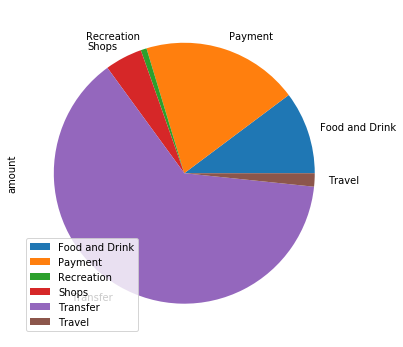

In [64]:
# Create a spending categories pie chart.
expenses['amount'].plot.pie(figsize=(6, 6),legend=True) 

In [51]:
# Create a DataFrame with the total expenses
transaction_df['month']=pd.to_datetime(transaction_df.index).month
expenses['amount'].sum()

# Display sample data
transaction_df.head()

,name,amount,category,month
date,,,,
2020-07-29,United Airlines,500,Travel,7
2020-07-27,Uber 072515 SF**POOL**,6.33,Travel,7
2020-07-24,Tectra Inc,500,Food and Drink,7
2020-07-23,AUTOMATIC PAYMENT - THANK,2078.5,Payment,7
2020-07-23,KFC,500,Food and Drink,7


In [25]:
# Reset index as month
expenses1 = transaction_df.reset_index().groupby('month').sum()
expenses1

,date,name,amount,category
month,,,,
4,2020-04-30,United Airlines,500.00,Travel
5,2020-05-302020-05-282020-05-252020-05-242020-0...,United AirlinesUber 072515 SF**POOL**Tectra In...,10645.24,TravelTravelFood and DrinkPaymentFood and Drin...
6,2020-06-292020-06-272020-06-242020-06-232020-0...,United AirlinesUber 072515 SF**POOL**Tectra In...,10645.24,TravelTravelFood and DrinkPaymentFood and Drin...
7,2020-07-292020-07-272020-07-242020-07-232020-0...,United AirlinesUber 072515 SF**POOL**Tectra In...,10645.24,TravelTravelFood and DrinkPaymentFood and Drin...


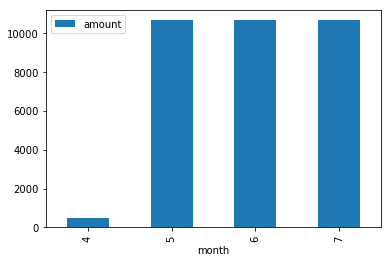

In [26]:
# Create a spending per month bar chart
expenses1.plot.bar()

## Retirement Planner
### Environment Setup

In [9]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
import os
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi
%matplotlib inline

In [10]:
# Set the random seed for resutls reproducibility (for testing purposes only)
np.random.seed(42)

### Portfolio Planner

In [11]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

### Data Collection

In [12]:
# Subset your tickers, then pull returns data:
# Set the ticker
ticker = ["SPY", "AGG"]

# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes of 1 year.
start_date = pd.Timestamp('2019-01-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2019-12-31', tz='America/New_York').isoformat()

# Get 1 year's worth of historical data for SPY and AGG
df = api.get_barset(
    ticker,
    timeframe,
    limit=None,
    start=start_date,
    end=end_date,
    after=None,
    until=None,
).df

# Drop unnecessary columns
df = df.drop(
    columns=['open', 'high', 'low', 'volume'],
    level=1
)

# Drop time from index
df.index = df.index.date

# Display sample data
df.head()

,AGG,SPY
,close,close
2019-01-02,106.585,249.89
2019-01-03,107.020,244.46
2019-01-04,106.695,252.41
2019-01-07,106.470,254.40
2019-01-08,106.420,256.65


### Monte Carlo Simulation

In [13]:
# Calculate the daily roi for the stocks and display sample data
daily_returns = df.pct_change()
daily_returns.head()

,AGG,SPY
,close,close
2019-01-02,NaN,NaN
2019-01-03,0.004081,-0.021730
2019-01-04,-0.003037,0.032521
2019-01-07,-0.002109,0.007884
2019-01-08,-0.000470,0.008844


In [14]:
# Use the `mean` function to calculate the mean of daily returns for `AGG` and `SPY`
avg_daily_return_agg = daily_returns.mean()['AGG']['close']
avg_daily_return_spy = daily_returns.mean()['SPY']['close']
print(f" AGG average daily return is {avg_daily_return_agg}") 
print(f" SPY average daily return is {avg_daily_return_spy}")

 AGG average daily return is 0.00021276976507473064
 SPY average daily return is 0.0010397627326754729


In [15]:
# Compute daily volatility
agg_volatility = daily_returns.std()['AGG']['close']
spy_volatility = daily_returns.std()['SPY']['close']
print(f" AGG volatility is {agg_volatility}") 
print(f" SPY volatility is {spy_volatility}")

 AGG volatility is 0.0020886019741764646
 SPY volatility is 0.007821228920771257


In [16]:
# Set number of simulations and trading days
num_simulations = 500
num_records = 252 * 30

# Save the last day's closing price
agg_last_price = df['AGG']['close'][-1]
spy_last_price = df['SPY']['close'][-1]

# Initialize empty DataFrame to hold simulated prices for each simulation
sim_price_df = pd.DataFrame()
portfolio_cumulative_returns = pd.DataFrame()

In [17]:
# Run the Monte Carlo Simulation
for n in range(num_simulations):
    
    # Initialize the simulated prices list with the last closing price of `AGG` and `SPY`
    sim_agg_prices = [agg_last_price]
    sim_spy_prices = [spy_last_price]
    
    # Simulate the returns for 252 days
    for i in range(num_records):
        
        # Calculate the simulated price using the last price within the list
        sim_agg_price = sim_agg_prices[-1] * (1 + np.random.normal(avg_daily_return_agg, agg_volatility))
        sim_spy_price = sim_spy_prices[-1] * (1 + np.random.normal(avg_daily_return_spy, spy_volatility))
        
        # Append the simulated price to the list
        sim_agg_prices.append(sim_agg_price)
        sim_spy_prices.append(sim_spy_price)
        
    # Append the simulated prices of each simulation to DataFrame
    sim_price_df["AGG prices"] = pd.Series(sim_agg_prices)
    sim_price_df["SPY prices"] = pd.Series(sim_spy_prices)

    # Calculate the daily returns of simulated prices
    sim_daily_returns = sim_price_df.pct_change()
    
    # Set the portfolio weights
    weights = [0.50, 0.50]

    # Use the `dot` function with the weights to multiply weights with each column's simulated daily returns
    portfolio_daily_returns = sim_daily_returns.dot(weights)
    
    # Calculate the normalized, cumulative return series
    portfolio_cumulative_returns[n] = (1 + portfolio_daily_returns.fillna(0)).cumprod()

# Print records from the DataFrame
portfolio_cumulative_returns.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000604,1.000124,0.998523,1.004401,1.010096,0.995974,0.998456,1.010612,1.000852,0.996150,...,1.001858,0.993705,1.002026,1.002192,0.996937,1.002826,1.001061,1.005117,0.998738,0.995512
2,1.007867,1.003834,1.002393,0.997218,1.008526,0.995133,0.995554,1.004837,1.000269,0.994867,...,1.005047,0.995744,1.003507,1.005198,0.997869,0.993261,1.001951,1.004018,0.997067,0.999168
3,1.007329,1.003456,1.002813,0.998035,1.006991,0.989972,0.999145,0.999607,1.000261,1.002253,...,1.005884,0.990967,1.004519,1.008907,0.993951,0.995374,1.006751,0.999321,0.999391,1.002741
4,1.012644,1.005603,1.006416,1.002090,1.011954,0.992319,1.003172,0.994595,1.002352,1.005408,...,1.003924,0.993864,1.004914,1.004276,0.995693,0.994602,1.004242,1.001925,0.998349,1.003639


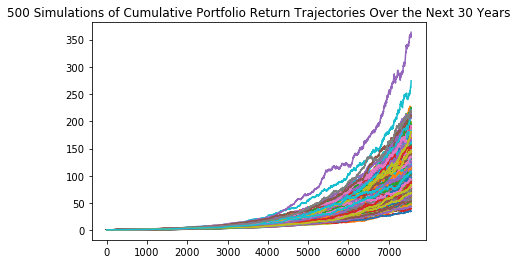

In [18]:
# Visualize the Simulation
plot_title = f"{n+1} Simulations of Cumulative Portfolio Return Trajectories Over the Next 30 Years"
portfolio_cumulative_returns.plot(legend=None, title=plot_title) 

In [19]:
# Select the last row for cumulative returns 
ending_cumulative_returns = portfolio_cumulative_returns.iloc[-1, :]
ending_cumulative_returns.round(2).head()

0    106.92
1     95.90
2    101.10
3     82.63
4     99.61
Name: 7560, dtype: float64

In [44]:
# Display the 90% confidence interval for the ending returns
confidence_interval_90 = ending_cumulative_returns.quantile([0.025, 0.925])
confidence_interval_90

0.025     54.709874
0.925    170.392693
Name: 7560, dtype: float64

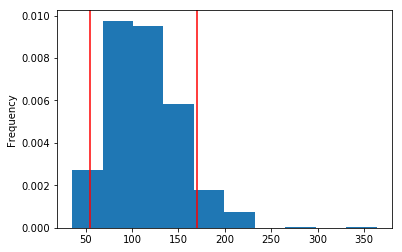

In [45]:
plt.figure();
ending_cumulative_returns.plot(kind='hist', density=True, bins=10)
plt.axvline(confidence_interval_90.iloc[0], color='r')
plt.axvline(confidence_interval_90.iloc[1], color='r')

### Retirement Analysis

In [46]:
# Compute cumulative returns for 10th, 50th, and 90th percentile
quantile = ending_cumulative_returns.quantile(q=[0.1, 0.5, 0.9])
print(f" The 10th, 50th, and 90th percentile is {quantile}")

 The 10th, 50th, and 90th percentile is 0.1     69.527827
0.5    107.507599
0.9    162.630095
Name: 7560, dtype: float64


In [47]:
# Set initial investment
initial_investment = 20000

expected_returns = initial_investment + (initial_investment * quantile)
expected_returns

0.1    1.410557e+06
0.5    2.170152e+06
0.9    3.272602e+06
Name: 7560, dtype: float64

In [48]:
confidence_interval_10 = ending_cumulative_returns.quantile(q=[0.025, 0.125])
print(f" The 10th percentile is {confidence_interval_10}")

confidence_interval_50 = ending_cumulative_returns.quantile(q=[0.025, 0.525])
print(f" The 50th percentile is {confidence_interval_50}")

confidence_interval_90 = ending_cumulative_returns.quantile(q=[0.025, 0.925])
print(f" The 90th percentile is {confidence_interval_90}")

 The 10th percentile is 0.025    54.709874
0.125    72.728782
Name: 7560, dtype: float64
 The 50th percentile is 0.025     54.709874
0.525    111.529699
Name: 7560, dtype: float64
 The 90th percentile is 0.025     54.709874
0.925    170.392693
Name: 7560, dtype: float64


In [49]:
# Set initial investment
initial_investment = 20000

# Calculate investment profit/loss of lower and upper bound cumulative portfolio returns
investment_pnl_lower_bound_90 = initial_investment + (initial_investment * confidence_interval_90.iloc[0])
investment_pnl_upper_bound_90 = initial_investment + (initial_investment * confidence_interval_90.iloc[1])

investment_pnl_lower_bound_50 = initial_investment + (initial_investment * confidence_interval_50.iloc[0])
investment_pnl_upper_bound_50 = initial_investment + (initial_investment * confidence_interval_50.iloc[1])

investment_pnl_lower_bound_10 = initial_investment + (initial_investment * confidence_interval_10.iloc[0])
investment_pnl_upper_bound_10 = initial_investment + (initial_investment * confidence_interval_10.iloc[1])
                                                    
# Print the results
print(f"There is a 10% chance that an initial investment of $20,000 in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${investment_pnl_lower_bound_10.round(2)} and ${investment_pnl_upper_bound_10.round(2)}")
print(f"There is a 50% chance that an initial investment of $20,000 in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${investment_pnl_lower_bound_50.round(0)} and ${investment_pnl_upper_bound_50.round(2)}")
print(f"There is a 90% chance that an initial investment of $20,000 in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${investment_pnl_lower_bound_90.round(2)} and ${investment_pnl_upper_bound_90.round(2)}")

There is a 10% chance that an initial investment of $20,000 in the portfolio over the next 30 years will end within in the range of $1114197.48 and $1474575.65
There is a 50% chance that an initial investment of $20,000 in the portfolio over the next 30 years will end within in the range of $1114197.0 and $2250593.98
There is a 90% chance that an initial investment of $20,000 in the portfolio over the next 30 years will end within in the range of $1114197.48 and $3427853.86


In [50]:
# Set Plaid's projected income
projected_income = 7389

# Calculate the 4% withdrawal for the ending return as retirement income
retirement_income = investment_pnl_upper_bound_10 * .04
retirement_income


58983.0259612462

In [51]:
# Determine if the retirement income meets or exceeds the current projected income
ret_inc = retirement_income.round(2)

print(f"Retirement income exceeds current projected income by ${ret_inc - projected_income}")
#ending return value multiplied by initial investment, multiply by 4%

Retirement income exceeds current projected income by $51594.03


In [52]:
# Re-calculate the retirement income with a 50% increase in the initial investment amount
initial_investment_2 = 30000

# Calculate investment profit/loss of lower and upper bound cumulative portfolio returns
investment_pnl_lower_bound_90_2 = initial_investment_2 + (initial_investment_2 * confidence_interval_90.iloc[0])
investment_pnl_upper_bound_90_2 = initial_investment_2 + (initial_investment_2 * confidence_interval_90.iloc[1])

investment_pnl_lower_bound_50_2 = initial_investment_2 + (initial_investment_2 * confidence_interval_50.iloc[0])
investment_pnl_upper_bound_50_2 = initial_investment_2 + (initial_investment_2 * confidence_interval_50.iloc[1])

investment_pnl_lower_bound_10_2 = initial_investment_2 + (initial_investment_2 * confidence_interval_10.iloc[0])
investment_pnl_upper_bound_10_2 = initial_investment_2 + (initial_investment_2 * confidence_interval_10.iloc[1])
                                                    
# Print the results
print(f"There is a 10% chance that an initial investment of $20,000 in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${investment_pnl_lower_bound_10_2.round(2)} and ${investment_pnl_upper_bound_10_2.round(2)}")
print(f"There is a 50% chance that an initial investment of $20,000 in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${investment_pnl_lower_bound_50_2.round(0)} and ${investment_pnl_upper_bound_50_2.round(2)}")
print(f"There is a 90% chance that an initial investment of $20,000 in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${investment_pnl_lower_bound_90_2.round(2)} and ${investment_pnl_upper_bound_90_2.round(2)}")

There is a 10% chance that an initial investment of $20,000 in the portfolio over the next 30 years will end within in the range of $1671296.21 and $2211863.47
There is a 50% chance that an initial investment of $20,000 in the portfolio over the next 30 years will end within in the range of $1671296.0 and $3375890.98
There is a 90% chance that an initial investment of $20,000 in the portfolio over the next 30 years will end within in the range of $1671296.21 and $5141780.79


In [53]:
# Set Plaid's projected income
projected_income = 7389

# Calculate the 4% withdrawal for the ending return as retirement income
retirement_income_2 = investment_pnl_upper_bound_10_2 * .04
retirement_income_2

88474.53894186931

In [54]:
# Determine if the retirement income meets or exceeds the current projected income
ret_inc_2 = retirement_income_2.round(2)

print(f"Retirement income exceeds current projected income by ${ret_inc_2 - projected_income}")
#ending return value multiplied by initial investment, multiply by 4%

Retirement income exceeds current projected income by $81085.54
